In [1]:
import numpy as np
import pandas as pd
import glob, os
import itertools
import matplotlib.image as mpimg
import cv2
import pickle

import classifier

%matplotlib inline
import matplotlib.pyplot as plt

classifier.pyc
/data1/yolo/detector/lib/classifier.pyc


In [2]:
file_list_good = sorted(glob.glob('/home/ubuntu/mynotebooks/yolo/validation/pics2/succeeded/lo_quality/*.jpg'))

In [3]:
net_main_1, meta_main_1 = classifier.load_net("/data1/yolo/model/yolo-obj.cfg", "/data1/yolo/model/weights/backup.1719.strict/yolo-obj_4368.weights", "/data1/yolo/model/obj.data.1719.strict")
detections_good = [classifier.detect(net_main_1, meta_main_1, cv2.imread(f), thresh=0.25) for f in file_list_good]

with open('/tmp/lo_quality.pkl', 'wb') as f:
    pickle.dump(detections_good, f)
detections_good = pickle.load( open( "/tmp/lo_quality.pkl", "rb" ) )

In [4]:
def max_detection(detections):
    if len(detections) == 0:
        return 0
    return max([d[1] for d in detections])

def accu_detection(detections):
    return sum([d[1] for d in detections])

(array([1.5625e+04, 0.0000e+00, 1.8500e+02, 5.2800e+02, 3.0500e+02,
        1.6100e+02, 1.2200e+02, 7.9000e+01, 5.9000e+01, 4.9000e+01,
        2.2000e+01, 2.4000e+01, 2.0000e+01, 1.2000e+01, 6.0000e+00,
        4.0000e+00, 3.0000e+00, 4.0000e+00, 4.0000e+00, 2.0000e+00]),
 array([0.        , 0.08977962, 0.17955923, 0.26933885, 0.35911847,
        0.44889808, 0.5386777 , 0.62845732, 0.71823694, 0.80801655,
        0.89779617, 0.98757579, 1.0773554 , 1.16713502, 1.25691464,
        1.34669425, 1.43647387, 1.52625349, 1.6160331 , 1.70581272,
        1.79559234]),
 <a list of 20 Patch objects>)

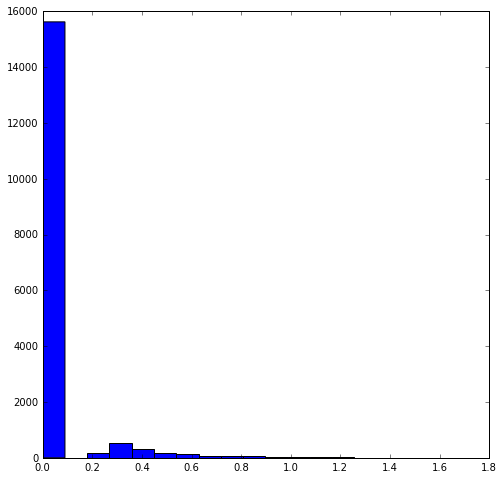

In [5]:
from functools import reduce
# detections = reduce(lambda x, y: x+y, detections)
fig=plt.figure(figsize=(8, 8))
plt.hist(np.array(map(accu_detection, detections_good)), bins=20)

(0, '190163')
(1, '190162')
(2, '190756')
(3, '191401')
(4, '191400')
(5, '191565')
(6, '191273')
(7, '190740')
(8, '191276')
(9, '191899')
(10, '191021')
(11, '191831')
(12, '190923')
(13, '190922')
(14, '191834')
(15, '191769')
(16, '190075')
(17, '191176')
(18, '191764')
(19, '191765')
(20, '191763')
(21, '190073')
(22, '191338')
(23, '190800')
(24, '190802')
(25, '190867')
(26, '191486')
(27, '191725')
(28, '190471')
(29, '191089')
(30, '191827')
(31, '191368')
(32, '190954')
(33, '191472')
(34, '191662')
(35, '191471')
(36, '191185')
(37, '190191')
(38, '190751')
(39, '190110')
(40, '191062')
(41, '190040')
(42, '190593')
(43, '191771')
(44, '191068')
(45, '190118')
(46, '191105')
(47, '190812')
(48, '191696')
(49, '190810')
(50, '191623')
(51, '190819')
(52, '190818')
(53, '190565')
(54, '190563')
(55, '190449')
(56, '191864')
(57, '190443')
(58, '191460')
(59, '190188')
(60, '191698')
(61, '191466')
(62, '190354')
(63, '191694')
(64, '191835')
(65, '191692')
(66, '190421')
(67, 

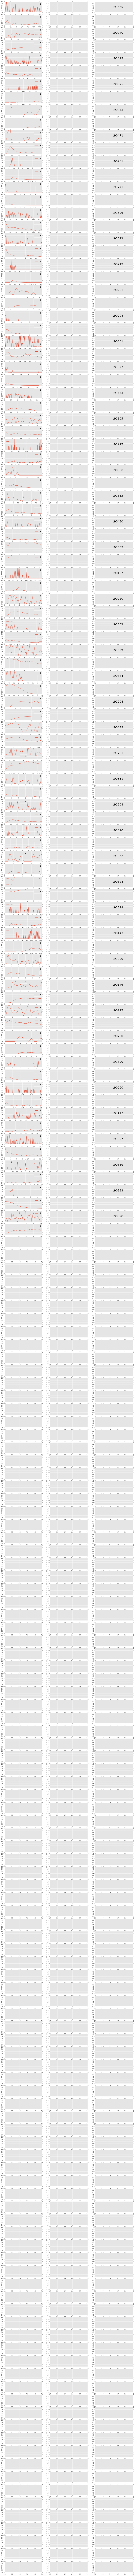

In [6]:
missed_good = []
videos = list(set([f[68:74] for f in file_list_good]))
for j, video in enumerate(videos):
    print(j, video)
    detections = [(detections_good[i], f) for i, f in enumerate(file_list_good) if video in f]
    df = pd.DataFrame(dict(d=np.array(map(accu_detection, [d[0] for d in detections]))))
#     df.plot(ax=axes[2*j,0], ylim=(0,1))
#     df.ewm(span=20).mean().plot(ax=axes[2*j+1,0], ylim=(0,1))
    if len(np.where(df.ewm(span=20).mean()[6:].values > 0.2)[0]) > 0:
        missed_good += [j]
#     axes[2*j,2].text(0.6, 0.5, video, size=20, ha="center", va="center",)
    
print("missed good: %s", len(missed_good)*1.0/len(videos))

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [16, 16*20]
fig, axes = plt.subplots(nrows=200, ncols=3)

for j, k in enumerate(missed_good):
    detections = [(detections_good[i], f) for i, f in enumerate(file_list_good) if videos[k] in f]

    df = pd.DataFrame(dict(d=np.array(map(accu_detection, [d[0] for d in detections]))))
    df.plot(ax=axes[2*j,0], ylim=(0,1))
    df.ewm(span=20).mean().plot(ax=axes[2*j+1,0], ylim=(0,1))
    axes[2*j,2].text(0.6, 0.5, videos[k], size=20, ha="center", va="center",)
